# 2021_01_18_Problema 1

En la siguiente tabla se presenta una muestra de entrenamiento no linealmente separable en $\mathbb{R}^2$ y los correspondientes multiplicadores de Lagrange óptimos obtenidos al entrenar una máquina de vectores soporte con esta muestra (y C=10):
$$\begin{array}{|l||rrrrrrrr|}
\hline
i &  1 &  2 &  3 &  4 &  5 &  6 & 7 & 8\\
\hline
x_{i1} &  1 &  3 &  4 &  4 &  3 &  1 & 3 & 2\\
x_{i2} &  4 &  2 &  1 &  3 &  1 &  2 & 3 & 3\\
\hline
\text{Clase} & +1 & +1 & -1 & -1 & -1 & +1& +1 & -1\\
\hline
\hline
\alpha^\star_i & ~0.0 & 10.0 & 0.0 & 6.0 & 6.4 & 2.4 & 10.0 & 10.0\\
\hline
\end{array}$$

Se pide:
1. Obtener la función discriminante lineal correspondiente y el valor del margen
2. Calcular las tolerancias de cada muestra de aprendizaje
3. Representar gráficamente la frontera lineal de separación entre clases, los márgenes y las muestras de entrenamiento, indicando cuáles son vectores soporte
4. Clasificar la muestra $(4,4)^t$

## Solución

**Pesos de la función discriminante:**

$\boldsymbol{\theta}^\star = %c_1~\alpha^\star_1~\boldsymbol{x_1} + 
                c_2~\alpha^\star_2~\boldsymbol{x_2} 
%              + c_3~\alpha^\star_3~\boldsymbol{x_3} 
              + c_4~\alpha^\star_4~\boldsymbol{x_4} 
              + c_5~\alpha^\star_5~\boldsymbol{x_5} 
              + c_5~\alpha^\star_6~\boldsymbol{x_6}
              + c_5~\alpha^\star_7~\boldsymbol{x_7}
              + c_5~\alpha^\star_8~\boldsymbol{x_8}$

$\theta^*_1 ~=~ (+1)~10.0~3+(-1)~6.0~4+(-1)~6.4~3+(+1)~2.4~1+(+1)~10.0~3+(-1)~10~2 ~=~ -0.8$

$\theta^*_2 ~=~ (+1)~10.0~2+(-1)~6.0~3+(-1)~6.4~1+(+1)~2.4~2+(+1)~10.0~3+(-1)~10~3 ~=~ +0.4$

Usando el vector soporte $\boldsymbol{x_4}$ (que verifica la condición : $0 < \alpha_4^* < C=10$)

$\theta^\star_0 = c_4-{\boldsymbol{\theta}^\star}^t\boldsymbol{x_4} = -1 - ((-0.8)~(4) + (0.4)~(3))~=~1.0$ 

Margen: $\displaystyle \frac{2}{\|\boldsymbol{\theta}\|} \approx 2.23$

**Calcular las tolerancias de cada muestra de aprendizaje:**
$$\begin{array}{llll}
  \zeta_1=0.0; & \zeta_2=1~-~c_2~({\boldsymbol{\theta}^\star}^t\boldsymbol{x_2}+ \theta^\star_0)= 1.6; &
  \zeta_3=0.0; & \zeta_4=0.0;\\
  \zeta_5=0.0; & \zeta_6=0.0; &
  \zeta_7=1~-~c_7~({\boldsymbol{\theta}^\star}^t\boldsymbol{x_7}+ \theta^\star_0)= 1.2; &
  \zeta_8=1~-~c_8~({\boldsymbol{\theta}^\star}^t\boldsymbol{x_8}+ \theta^\star_0)= 1.6
\end{array}$$

**Frontera de separación y representación gráfica:**

Ecuación de la frontera lineal de separación:
$~ - 0.8~x_1 + 0.4~x_2 + 1.0 ~=~ 0$

Los vectores de entrenamiento son todos los de la tabla. De ellos, los vectores soporte son: $(2,3)^t, (4,2)^t, (3,2)^t, (2,2)^t\,(1,2)^t$.

El margen lo definen las dos rectas paralelas a la frontera de separación, cada una de ellas situada a una distancia de $2.23/2
\approx 1.12$ y cuyas ecuaciones son:

$~ - 0.8~x_1 + 0.4~x_2 + 1.0 ~=~ +1\quad$ y $\quad - 0.8~x_1 + 0.4~x_2 + 1.0 ~=~ -1$

Representación gráfica:
<div><img src="2021_01_18_Problema 1.png" width=400></div>

**Clasificación de la muestra $(4,4)^t$:**

El valor de la función discriminante para este vector es:  

$\theta^*_1~x_1+\theta^*_2~x_2~+~\theta^*_0= (-0.8)*4 + (0.467)*4 + 1.0 = -0.6 < 0 ~\Rightarrow\,$ clase -1.


## Solución con sklearn

In [1]:
import numpy as np; np.set_printoptions(precision=4, suppress=True); from sklearn import svm
X = np.array([[1, 4], [3, 2], [4, 1], [4, 3], [3, 1], [1, 2], [3, 3], [2, 3]]).astype(np.float32)
y = np.array([1, 1, -1, -1, -1, 1, 1, -1]).astype(np.int32); N, D = X.shape
C = 10.0; clf = svm.SVC(C=C, kernel='linear').fit(X, y)
a = np.zeros(N); a[clf.support_] = clf.dual_coef_ * y[clf.support_]; print('alfa: ', a)
w = clf.coef_[0]; w0 = clf.intercept_ [0]; m = 2.0/np.linalg.norm(w); 
t = np.zeros(N); t[clf.support_] = 1.0 - y[clf.support_] * (clf.support_vectors_ @ w + w0)
print('w:', w, ' w0:', round(w0, 2), ' margen:', round(m, 4), ' t:', t)
Z = [[4, 4]]; print('Clase de', Z[0],':',clf.predict([[4, 4]])[0])

alfa:  [ 0.  10.   0.   6.   6.4  2.4 10.  10. ]
w: [-0.8  0.4]  w0: 1.0  margen: 2.2361  t: [ 0.   1.6  0.  -0.  -0.  -0.   1.2  1.6]
Clase de [4, 4] : -1


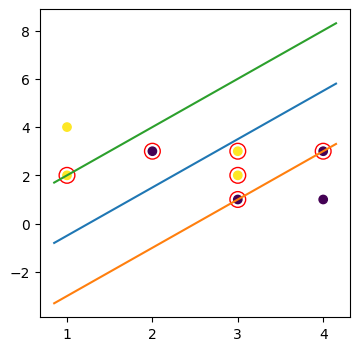

In [2]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(4, 4)); ax.scatter(*X.T, c=y)
x1 = np.linspace(*ax.get_xlim()); x2 = (-w[0]*x1 - w0)/w[1]
ax.plot(x1, x2, x1, x2 - 1/w[1], x1, x2 + 1/w[1])
ax.scatter(*clf.support_vectors_.T, s=128, facecolors='none', edgecolors='r');